In [207]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For plotting 3D surface

import seaborn as sns
%matplotlib inline

## Warm up Exercise

In [208]:
def warmUpExercise():
    A =np.eye(5)
    return A

In [209]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [210]:
# Load the data

df = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

In [211]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [212]:
# Check to see if there is missing data

df.info()

#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## Plot scatter plot

Text(0, 0.5, 'Profit in $10,000s')

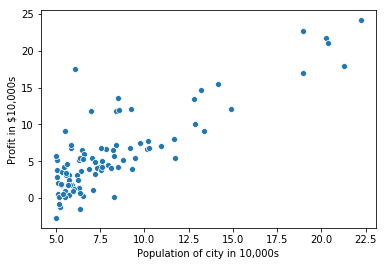

In [213]:
sns.scatterplot(x='Population', y='Profit', data = df)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')

## Compute cost function

In [214]:
# Firstly compute cost function using "squared-error approach"

def computeCost(X, y, theta):
    m = len(X)
    h = np.dot(X, theta.T)
    summation_terms = np.power((h - y), 2)
    J = np.sum(summation_terms)/ (2 * m)
    return J

In [215]:
# for the training example X, a column of constant value "1" is inputed in the dataset

df.insert(0, 'ones', 1)

In [216]:

df.head() # To check that the "intercept" parameter is successfully implemented

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [217]:
#Set training examples X(explanatory variable) and y(target variable)

X = df.loc[:, 'ones':'Population']
y = df.loc[:, 'Profit']

In [218]:
# Convert X and y dataframe into matrices

X = X.values
y = y.values

# Initialize the parameter function "theta" in matrix form

theta = np.array([0,0])

In [219]:
X.shape, y.shape, theta.shape

((97, 2), (97,), (2,))

In [220]:
# Perform the "computeCost" function

computeCost(X, y, theta)

32.072733877455676

## Gradient descent algorithm

In [221]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = []
    
    for i in range(num_iters):
        error = (np.dot(X, theta.T)) - y
        theta = theta - (alpha/m) * (np.dot(X.T, error))
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

In [238]:
# initialize variables parameter "theta", learning rate and iterations
theta = np.array([0,0])
alpha = 0.01
num_iters = 1000

# perform gradient descent to "fit" the model parameters
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
theta

array([-3.24140214,  1.1272942 ])

Text(0, 0.5, 'Cost J')

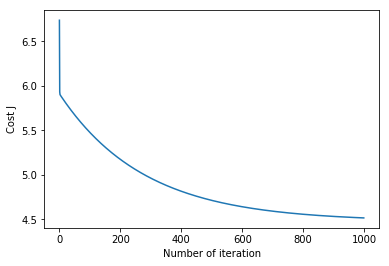

In [239]:
# Plot cost J against iteration

plt.plot(J_history)
plt.xlabel('Number of iteration')
plt.ylabel('Cost J')

Text(0.5, 1.0, 'Best fit line with gradient descent')

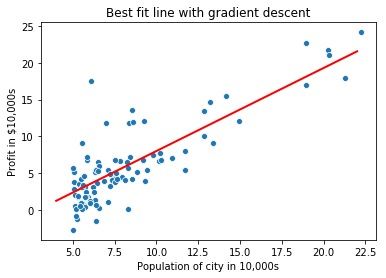

In [240]:
# Plot gradient descent on scatter plot

sns.scatterplot(x='Population', y='Profit', data = df)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')

# From scatter plot above, It is observed that population range from about 4 to 23
x = np.arange(4,23)
h = theta[0] + (theta[1] * x) # hypothesis with parameter theta based on gradient descent with 1000 iterations
plt.plot(x,h, color='red', linewidth=2)
plt.title('Best fit line with gradient descent')

In [252]:
# Predict profit for population of 35000 and 70000

np.array([1, 3.5]).dot(theta.T) * 10000
np.array([1, 3.5]).dot(theta.T) * 10000

7041.275642242222

## Plot surface and contour for cost function

Text(0.5, 1.0, 'Contour showing minimum')

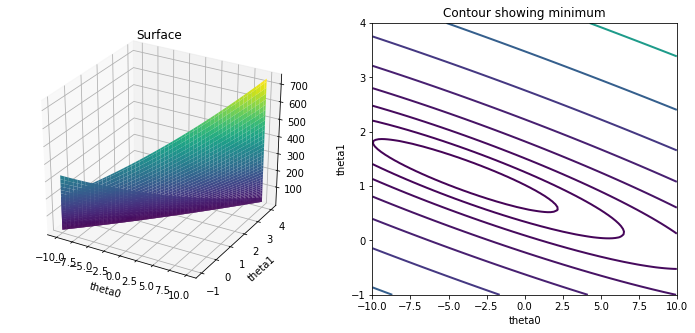

In [184]:
# Drid over which to calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to array of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X, y, theta)
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# Surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# Contour plot
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour showing minimum')

## Optional exercise

In [185]:
# Load in dataset with multi features

df2 = pd.read_csv('ex1data2.txt', header=None, names=['House_Size', 'Number_Of_Bedrooms', 'House_Price'])

In [186]:
df2
X = df2.loc[:, 'House_Size':'Number_Of_Bedrooms'].values # Locate and extract values of the array
y = df2.loc[:, 'House_Price'].values

In [187]:
# Perform feature normalization to put features in same scale to make gradient descent algorithm reach optimum quickly

def featureNormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])
        
        X_norm[:,i] = (X[:,i] - mu[i])/ sigma[i]
        
    
    
    return X_norm, mu, sigma
    

In [188]:
 X_norm, mu, sigma = featureNormalize(X)

In [189]:
print(mu)
print(sigma)

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [190]:
# compute cost for multivarible function

# Firstly, Add column with values of 1 to represent the intercept parameter

X = np.concatenate([np.ones((len(X_norm),1)), X_norm], axis=1)

In [191]:
# Compute cost function

def computeCostMulti(X, y, theta):
    
    m = len(X)
    J = [] # Initialize cost function
    
    h = np.dot(X, theta.T)
    error = (h - y) ** 2
    J = np.sum(error) / (2 * m)
    
    return J
    
    

In [192]:
# Initialize theta

theta = np.array([0,0,0])
computeCostMulti(X, y, theta)

65591548106.45744

In [193]:
# Perform gradient descent for multivariate function
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = []
    
    for i in range(num_iters):
        error = (np.dot(X, theta.T)) - y
        theta = theta - (alpha/m) * (np.dot(X.T, error))
        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history2

In [194]:
# initialize variables parameter "theta", learning rate and iterations
theta = np.array([0,0,0])
alpha = 0.01
num_iters = 400

# perform gradient descent to "fit" the model parameters
theta, J_history2 = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [195]:
theta

array([316903.67787033, 103170.32196862,  39227.13822499])

Text(0, 0.5, 'Cost J')

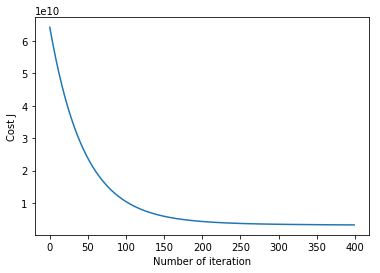

In [196]:
# Plot cost J_history2 against iteration

plt.plot(J_history2)
plt.xlabel('Number of iteration')
plt.ylabel('Cost J')

In [202]:
# Using Normal equation for the multivariable function

# Define function for normal equation

def normalEqn(X, y):
    
    theta = np.dot(np.linalg.pinv((np.dot(X.T, X))), (np.dot(X.T, y)))
    return theta 

In [203]:
normalEqn(X,y)

array([324486.68818838, 123693.06633751,  16256.91543233])